A. Clasificación Estelar.

En este repositorio se consigna un conjunto de datos con información de diversas características
físicas de las estrellas. El objetivo final es lograr entrenar un algoritmo de clasificación, basado en
arboles de decisión, que permita obtener el tipo estelar a partir de las demás características físicas.

El archivo fue tomado de la página

https://www.kaggle.com/datasets/deepu1109/star-dataset

del autor Deepraj Baidya. El conjunto de datos contiene las siguientes características:
- emperatura absoluta (K)
- Lumiosidad relativa (L/L⊙ )
- Radio relativo (R/R⊙ )
- Magnitud absoluta (Mv )
- Color estelar (white, red, blue, - - yellow, etc.)
- Clase espectral (O,B,A,F,G,K,M)
- Tipo estelar (Red Warf, Brown Warf, White Dwarf, Main Sequence, Supergiant, Hypergiant)

Se incluyen 240 objetos y contiene tanto datos observacionales como sintéticos. La codificación de las
etiquetas es la siguiente:
- Brown Dwarf → Star Type = 0
- Red Dwarf → Star Type = 1
- White Dwarf → Star Type = 2
- Main Sequence → Star Type = 3
- Supergiant → Star Type = 4
- Hypergiant → Star Type = 5

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Importar los datos de csv a colab
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Datos
Stars=pd.read_csv('/content/drive/Shareddrives/Astrofísica Computacional/Taller 7/6class.csv')
Stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [49]:
#Codificación ordinal

SpectralClass = OrdinalEncoder(categories=[['O','B','A','F','G','K','M']])
SpectralClass.fit(Stars[["Spectral Class"]])
Stars["Spectral Class"] = SpectralClass.transform(Stars[["Spectral Class"]])

#StarColor = OrdinalEncoder(categories=[['white','Red','Blue','Yellow','yellow-orange','Blue White','Yellowish White','Pale yellow orange','Blue-white','yellow-white','	Whitish','yellow-white','Orange','White-Yellow','yellowish','	Yellowish','Orange-Red','Blue white','White']])
#StarColor.fit(Stars[["Star color"]])
#Stars["Star color"] = StarColor.transform(Stars[["Star color"]])

In [50]:
#Definición de los target (tipo de estrellas) 
Type = np.array(Stars['Star type'])

#Definición de los features (caracteristicas)
fs = Stars.copy()
del fs['Star type']
del fs['Star color']
#del fs['Spectral Class']
fs = np.array(fs)

fs.shape, Type.shape

((240, 5), (240,))

In [51]:
#Creación de la base de entrenamiento y de prueba
train_features, test_features, train_targets, test_targets = train_test_split(fs, Type, random_state=60, test_size=0.3)
train_features.shape, test_features.shape, train_targets.shape, test_targets.shape

((168, 5), (72, 5), (168,), (72,))

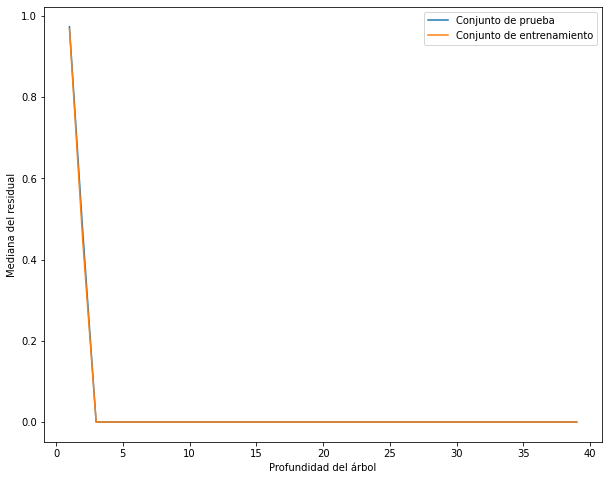

In [52]:
#Comprobación del error de los datos en función de la profundidad del árbol
Prof  = range(1,40)
Test  = np.zeros(len(Prof))
Train = np.zeros(len(Prof))

for i in range(len(Prof)):
  #Definición del árbol de decisión
  Mytree = DecisionTreeRegressor(max_depth=Prof[i])
  #Entrenamiento del modelo
  Mytree.fit(train_features, train_targets)
  #predicciónes
  Ptest = Mytree.predict(test_features)
  Ptrain = Mytree.predict(train_features)
  #Mediana de los residuales
  Test[i]  = np.median(np.abs(Ptest - test_targets))
  Train[i] = np.median(np.abs(Ptrain - train_targets))

#Plot
plt.figure(figsize=(10,8))
plt.plot(Prof, Test , label='Conjunto de prueba')
plt.plot(Prof, Train, label='Conjunto de entrenamiento')
plt.xlabel(r'Profundidad del árbol')
plt.ylabel(r'Mediana del residual')
plt.legend()
plt.show()

In [53]:
#Entrenamiento del modelo
Mytree = DecisionTreeRegressor(max_depth=5)
Mytree.fit(train_features, train_targets)

#Creación de array de predicciónes con los datos de prueba
predictions = Mytree.predict(test_features)
predictions_Mytree = np.zeros(len(predictions),dtype=int )


for i in range(0,len(predictions_Mytree)):
  predictions_Mytree[i] = int(predictions[i])

#Mediana de los residuales 
eval_Mytree = np.median(np.abs(predictions_Mytree - test_targets))
eval_Mytree

0.0

In [55]:
#Creando el data frame de test_features
column_values = ['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)','Absolute magnitude(Mv)','Spectral Class']

test = pd.DataFrame(data = test_features,  
                  columns = column_values)

#Creando el data frame de test_targets
column_value = ['Real star type']
testt = pd.DataFrame(data = test_targets,
                     columns = column_value)

#Creando el data frame de predictions
column_value = ['Star type predicted']
predictions = pd.DataFrame(data = predictions_Mytree,
                     columns = column_value)

#Union de los dataframes del testeo
test['Real star type'] = testt['Real star type']
test['Star type predicted'] = predictions['Star type predicted']
test



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Spectral Class,Real star type,Star type predicted
0,3100.0,0.008000,0.31000,11.17,6.0,1,1
1,3158.0,0.001350,0.16100,13.98,6.0,1,1
2,3660.0,363000.000000,1673.00000,-11.92,6.0,5,5
3,3496.0,0.001250,0.33600,14.94,6.0,1,1
4,8500.0,0.000500,0.01000,14.50,2.0,2,2
...,...,...,...,...,...,...,...
67,33300.0,240000.000000,12.00000,-6.50,1.0,4,4
68,7723.0,0.000140,0.00878,14.81,2.0,2,2
69,2800.0,0.000200,0.16000,16.65,6.0,0,0
70,3453.0,0.000621,0.07730,17.08,6.0,0,0


In [56]:
#Agrupación por tipo estelar de los datos de testeo
test_tipo0 = test[test['Real star type'] == 0]
test_tipo1 = test[test['Real star type'] == 1]
test_tipo2 = test[test['Real star type'] == 2]
test_tipo3 = test[test['Real star type'] == 3]
test_tipo4 = test[test['Real star type'] == 4]
test_tipo5 = test[test['Real star type'] == 5]

p_tipo0 = test[test['Star type predicted'] == 0.0]
p_tipo1 = test[test['Star type predicted'] == 1.0]
p_tipo2 = test[test['Star type predicted'] == 2.0]
p_tipo3 = test[test['Star type predicted'] == 3.0]
p_tipo4 = test[test['Star type predicted'] == 4.0]
p_tipo5 = test[test['Star type predicted'] == 5.0]

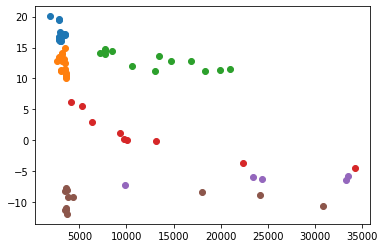

In [57]:
plt.scatter(test_tipo0['Temperature (K)'],test_tipo0['Absolute magnitude(Mv)'])
plt.scatter(test_tipo1['Temperature (K)'],test_tipo1['Absolute magnitude(Mv)'])
plt.scatter(test_tipo2['Temperature (K)'],test_tipo2['Absolute magnitude(Mv)'])
plt.scatter(test_tipo3['Temperature (K)'],test_tipo3['Absolute magnitude(Mv)'])
plt.scatter(test_tipo4['Temperature (K)'],test_tipo4['Absolute magnitude(Mv)'])
plt.scatter(test_tipo5['Temperature (K)'],test_tipo5['Absolute magnitude(Mv)'])

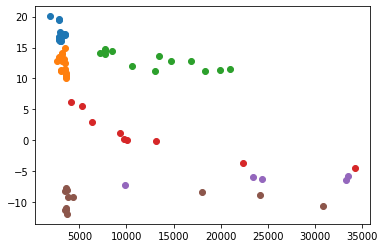

In [58]:
plt.scatter(p_tipo0['Temperature (K)'],p_tipo0['Absolute magnitude(Mv)'])
plt.scatter(p_tipo1['Temperature (K)'],p_tipo1['Absolute magnitude(Mv)'])
plt.scatter(p_tipo2['Temperature (K)'],p_tipo2['Absolute magnitude(Mv)'])
plt.scatter(p_tipo3['Temperature (K)'],p_tipo3['Absolute magnitude(Mv)'])
plt.scatter(p_tipo4['Temperature (K)'],p_tipo4['Absolute magnitude(Mv)'])
plt.scatter(p_tipo5['Temperature (K)'],p_tipo5['Absolute magnitude(Mv)'])